# Linear Model in Python

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt 
import scipy.stats as scp

### NYC 2013-2017 ELA Test Results by Grade
This is a dataset of the English Language Arts test results of all students from third to eighth grade. Created by data.cityofnewyork.us, but grabbed from [data.gov](https://catalog.data.gov/dataset/2013-2017-ela-test-results-by-grade-school-all)

The first question was whether district affects the percentage of students that are at grade level for the ELA test. Level 3 is considered proficient for their grade.

In [2]:
ELA_test_results = pd.read_csv('data/2013-2017_ELA_Test_Results_by_Grade_-_School_-_All.csv')
ELA_test_results['Level3+4_%'] = pd.to_numeric(ELA_test_results['Level3+4_%'], errors = 'coerce')
ELA_test_results['Level1_%'] = pd.to_numeric(ELA_test_results['Level1_%'], errors = 'coerce')
ELA_test_results['Level2_%'] = pd.to_numeric(ELA_test_results['Level2_%'], errors = 'coerce')
ELA_test_results['Level3_%'] = pd.to_numeric(ELA_test_results['Level3_%'], errors = 'coerce')
ELA_test_results['Level4_%'] = pd.to_numeric(ELA_test_results['Level4_%'], errors = 'coerce')

ELA_test_results


,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level3+4_%
0,01M015,PS 015 ROBERTO CLEMENTE,3,2013,All Students,27,289,14,51.9,11,40.7,2,7.4,0,0.0,2,7.4
1,01M015,PS 015 ROBERTO CLEMENTE,3,2014,All Students,18,285,10,55.6,8,44.4,0,0.0,0,0.0,0,0.0
2,01M015,PS 015 ROBERTO CLEMENTE,3,2015,All Students,16,282,9,56.3,5,31.3,2,12.5,0,0.0,2,12.5
3,01M015,PS 015 ROBERTO CLEMENTE,3,2016,All Students,20,293,10,50.0,6,30.0,4,20.0,0,0.0,4,20.0
4,01M015,PS 015 ROBERTO CLEMENTE,3,2017,All Students,27,302,10,37.0,8,29.6,7,25.9,2,7.4,9,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23983,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2013,All Students,143,273,88,61.5,49,34.3,6,4.2,0,0.0,6,4.2
23984,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2014,All Students,224,271,145,64.7,71,31.7,8,3.6,0,0.0,8,3.6
23985,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2015,All Students,309,277,173,56.0,115,37.2,19,6.1,2,0.6,21,6.8
23986,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2016,All Students,266,284,110,41.4,133,50.0,21,7.9,2,0.8,23,8.6


In [3]:
ELA_test_results['District'] = ELA_test_results['DBN'].str[:2]
ELA_test_results['Borough'] = ELA_test_results['DBN'].str[2:3]
ELA_test_results['School Number'] = ELA_test_results['DBN'].str[3:]
ELA_test_results['District'] = pd.to_numeric(ELA_test_results['District'], errors = 'coerce')
ELA_test_results['School Number'] = pd.to_numeric(ELA_test_results['School Number'], errors = 'coerce')
ELA_test_results.head()


,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level3+4_%,District,Borough,School Number
0,01M015,PS 015 ROBERTO CLEMENTE,3,2013,All Students,27,289,14,51.9,11,40.7,2,7.4,0,0.0,2,7.4,1,M,15
1,01M015,PS 015 ROBERTO CLEMENTE,3,2014,All Students,18,285,10,55.6,8,44.4,0,0.0,0,0.0,0,0.0,1,M,15
2,01M015,PS 015 ROBERTO CLEMENTE,3,2015,All Students,16,282,9,56.3,5,31.3,2,12.5,0,0.0,2,12.5,1,M,15
3,01M015,PS 015 ROBERTO CLEMENTE,3,2016,All Students,20,293,10,50.0,6,30.0,4,20.0,0,0.0,4,20.0,1,M,15
4,01M015,PS 015 ROBERTO CLEMENTE,3,2017,All Students,27,302,10,37.0,8,29.6,7,25.9,2,7.4,9,33.3,1,M,15


In [4]:
# Code block 3: The linear model
Y = ELA_test_results['District']
X = ELA_test_results[['Level1_%', 'Level2_%', 'Level3_%', 'Level4_%']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               District   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     180.6
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          1.03e-152
Time:                        20:43:37   Log-Likelihood:                -87119.
No. Observations:               23939   AIC:                         1.742e+05
Df Residuals:                   23934   BIC:                         1.743e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.7610    102.874      1.582      0.1

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The district only shows a small percentage of correlation across all levels of proficiency at about 3%.

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


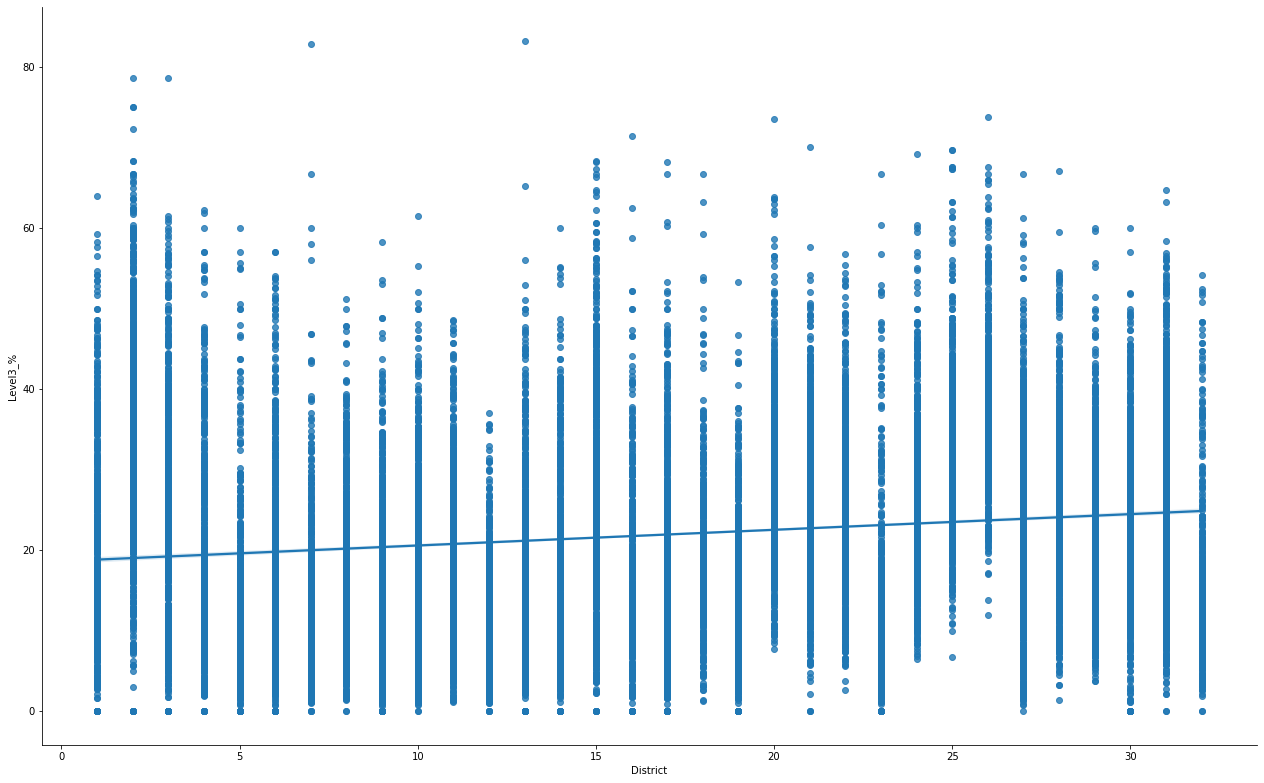

In [5]:
p = sb.lmplot('District', 'Level3_%', data=ELA_test_results)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.show()

A linear visual model is probably not the best for this particular data set as the change in District number doesn't really correspond to the change in level.

A box plot that allows you to see the range of values for each district seems to be a better visualization. The ELA scores were pivoted by DBN, giving averages across all years.

In [6]:
ELA_pivoted = ELA_test_results.pivot_table(ELA_test_results, index=['DBN'])
ELA_pivoted
# ELA_test_results = pd.get_dummies(ELA_test_results, columns=['Borough'], drop_first=True)

,District,Level1_%,Level2_%,Level3+4_%,Level3_%,Level4_%,Number Tested,School Number,Year
DBN,,,,,,,,,
01M015,1,43.535000,42.635000,13.845000,12.710000,1.130000,30.800000,15,2015.000000
01M019,1,21.825000,39.795000,38.380000,29.230000,9.155000,48.500000,19,2015.000000
01M020,1,36.335000,37.620000,26.060000,20.185000,5.880000,112.300000,20,2015.000000
01M034,1,30.511429,46.448571,23.034286,19.491429,3.534286,70.571429,34,2015.000000
01M063,1,29.280000,36.980000,33.740000,27.230000,6.510000,27.400000,63,2015.000000
...,...,...,...,...,...,...,...,...,...
32K377,32,52.051429,37.577143,10.382857,9.548571,0.825714,84.800000,377,2015.000000
32K383,32,9.612000,37.704000,52.684000,36.400000,16.276000,345.440000,383,2015.000000
32K384,32,36.122857,40.188571,23.685714,18.671429,5.014286,104.571429,384,2015.000000


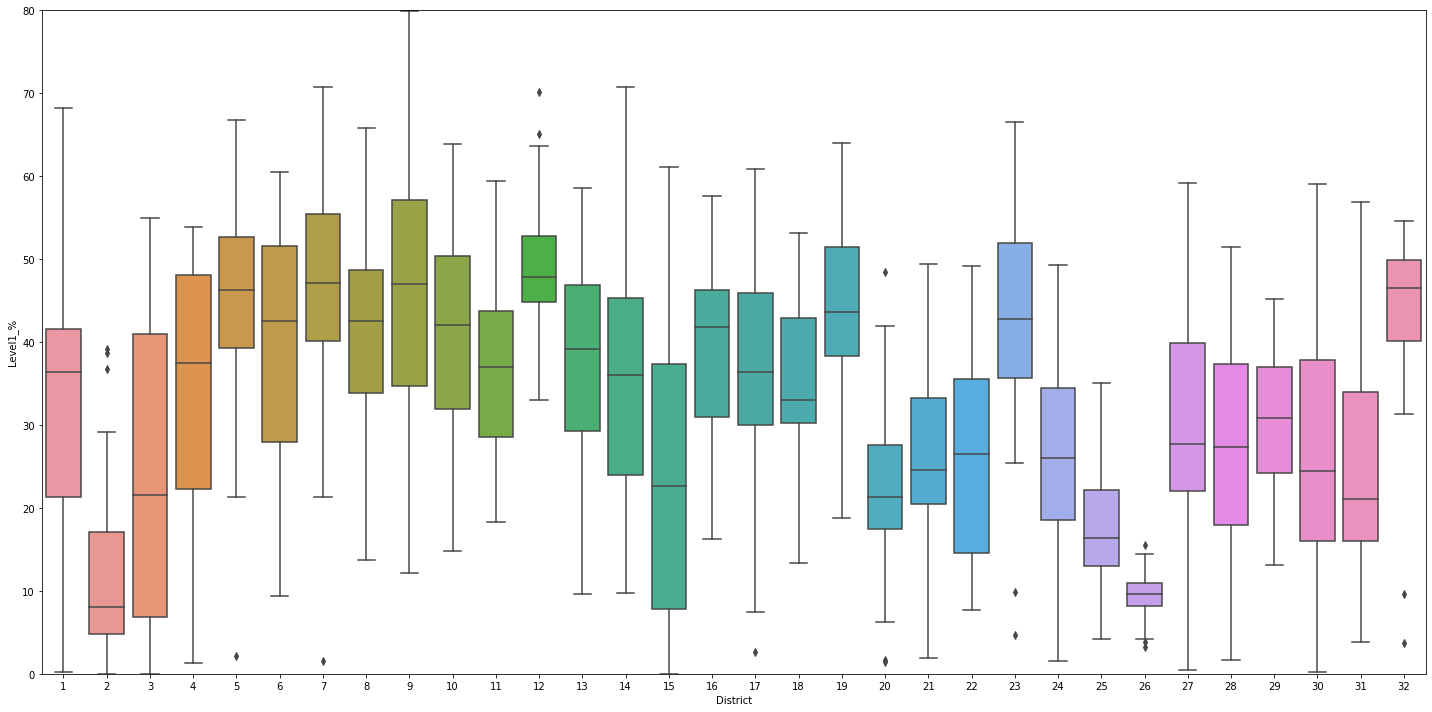

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level1_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 1 proficiency have students performing well below grade level. There are eight districts with the third quartile entering 50% or above. There are only four districts any of the first to third quartile below 10%.

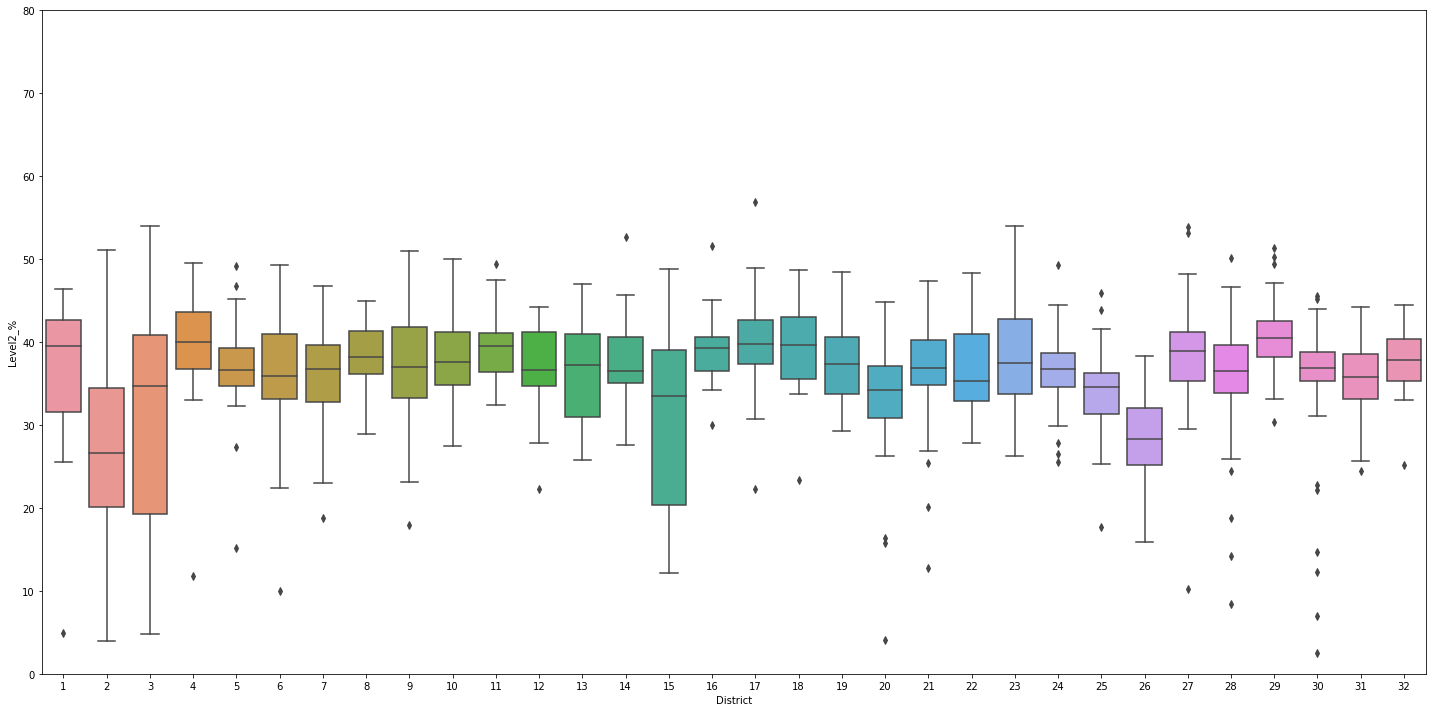

In [8]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level2_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 2 Proficiency have students that are partially proficient in standards for their grade. Only five districts have the first through third quartile below 40%.

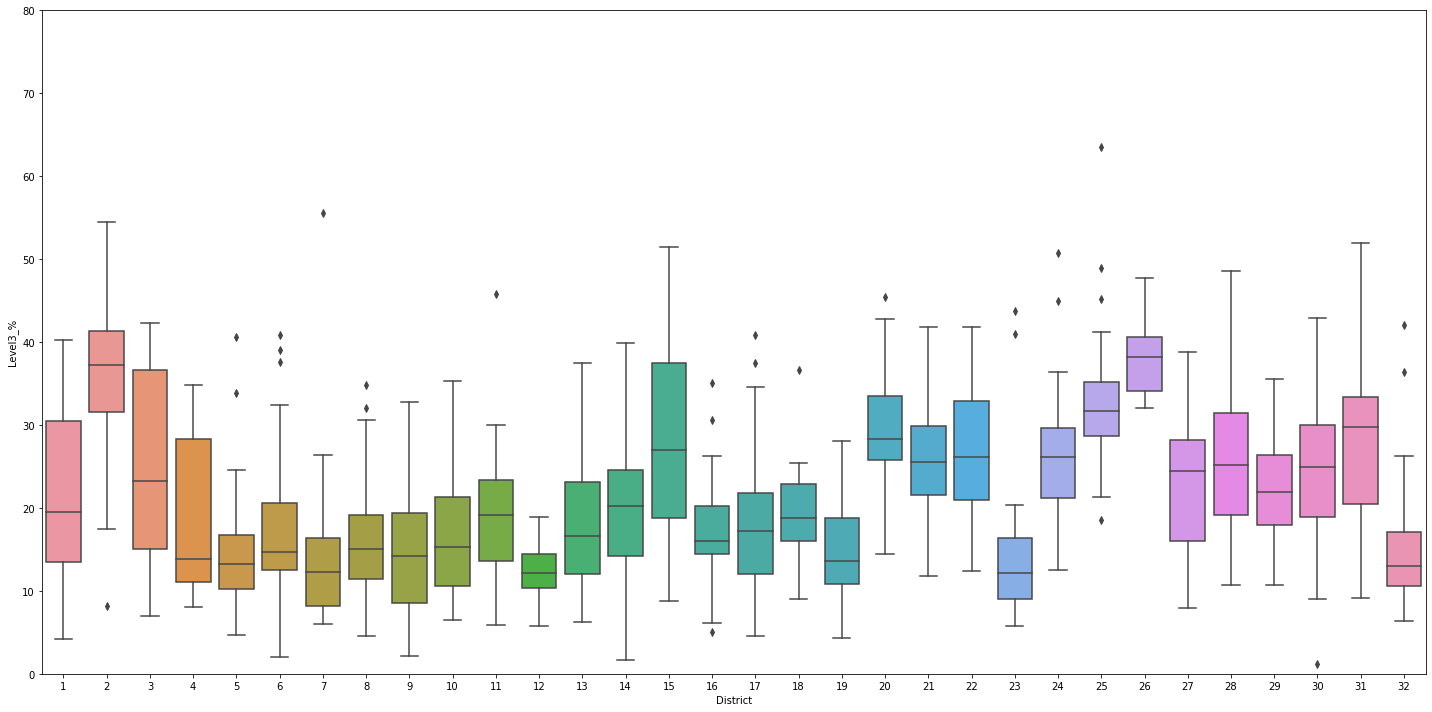

In [9]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level3_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 3 Proficiency have students performing at a proficient level for their grade. Only two districts have 40% of their students in the third quartile.

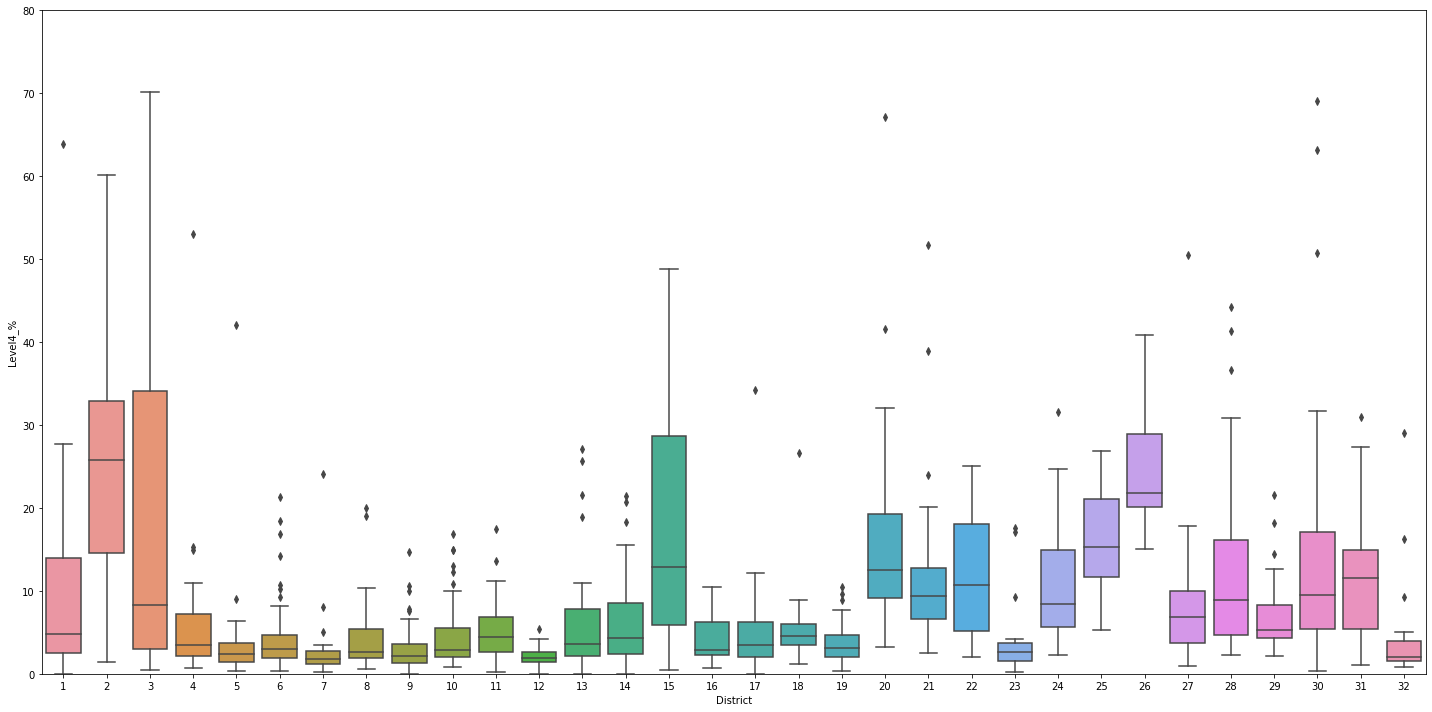

In [10]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level4_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 4 Proficiency have students performing at level exceling in standards for their grade. Only three districts have their first through third quartile above 10%.

### Adding Historical Attendance Data
Using data from [2012 - 2017 Historical Monthly Grade Level Attendance By School](https://catalog.data.gov/dataset/2012-2017-historical-monthly-grade-level-attendance-by-school) and combining data sets pivoted on the unique DBN value allowed for a linear model comparing absentee rates to ELA test scores.

In [11]:
Hist_attendance = pd.read_csv('data/2012_-_2017_Historical_Monthly_Grade_Level_Attendance_By_School.csv')

The table is pivoted on the 'School' column, which is the DBN, averaging the absences and present counts across each of the ten months for the six years in the study. 

In [12]:
ATT_pivoted = Hist_attendance.pivot_table(Hist_attendance
, index=['School'])
ATT_pivoted.rename_axis('DBN')

,Absent,GradeSort,MonthCode,Present,Released,RosterCount
DBN,,,,,,
01M015,34.242857,2.000000,5.500000,427.174286,2.354286,26.482857
01M019,59.368571,2.000000,5.500000,652.508571,3.991429,40.377143
01M020,100.700000,2.000000,5.500000,1430.265714,7.457143,86.482857
01M034,60.810000,3.500000,5.500000,631.992000,3.000000,39.402000
01M063,36.142857,2.000000,5.500000,450.077143,2.451429,27.608571
...,...,...,...,...,...,...
75X469,148.311111,1.111111,5.500000,997.188889,0.533333,65.433333
75X721,381.535000,10.500000,5.500000,1999.905000,22.210000,135.095000
75X723,119.286701,5.397237,5.511226,665.564767,6.264249,45.879102


The ELA test results and Attendance data are joined on the DBN axis. All schools that were not in both data sets were removed – primarily high schools from the attendence data as they were not in the ELA data.

A new column was created calculating the percentage of students that were absent from the total school population.

In [13]:
ELA_ATT = ELA_pivoted.join(ATT_pivoted, how='outer')
ELA_ATT.dropna(axis=0, inplace=True)
ELA_ATT['Percent Absent'] = ELA_ATT.apply(lambda row: row['Absent'] / (row['Present'] + row['Absent']) * 100, axis=1)
ELA_ATT

,District,Level1_%,Level2_%,Level3+4_%,Level3_%,Level4_%,Number Tested,School Number,Year,Absent,GradeSort,MonthCode,Present,Released,RosterCount,Percent Absent
01M015,1.0,43.535000,42.635000,13.845000,12.710000,1.130000,30.800000,15.0,2015.000000,34.242857,2.000000,5.5,427.174286,2.354286,26.482857,7.421236
01M019,1.0,21.825000,39.795000,38.380000,29.230000,9.155000,48.500000,19.0,2015.000000,59.368571,2.000000,5.5,652.508571,3.991429,40.377143,8.339722
01M020,1.0,36.335000,37.620000,26.060000,20.185000,5.880000,112.300000,20.0,2015.000000,100.700000,2.000000,5.5,1430.265714,7.457143,86.482857,6.577548
01M034,1.0,30.511429,46.448571,23.034286,19.491429,3.534286,70.571429,34.0,2015.000000,60.810000,3.500000,5.5,631.992000,3.000000,39.402000,8.777400
01M063,1.0,29.280000,36.980000,33.740000,27.230000,6.510000,27.400000,63.0,2015.000000,36.142857,2.000000,5.5,450.077143,2.451429,27.608571,7.433437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32K377,32.0,52.051429,37.577143,10.382857,9.548571,0.825714,84.800000,377.0,2015.000000,76.520000,3.500000,5.5,787.484000,4.646000,48.944000,8.856440
32K383,32.0,9.612000,37.704000,52.684000,36.400000,16.276000,345.440000,383.0,2015.000000,177.640000,6.500000,5.5,3861.395000,13.545000,226.520000,4.398080
32K384,32.0,36.122857,40.188571,23.685714,18.671429,5.014286,104.571429,384.0,2015.000000,78.998000,3.500000,5.5,1109.794000,5.354000,67.346000,6.645233
32K554,32.0,3.695000,25.205000,71.090000,42.015000,29.065000,87.500000,554.0,2015.000000,40.720000,9.000000,5.5,832.277143,40.148571,50.920000,4.664391


The percentage of absentees as a factor in the percentage of students meeting grade level proficiency in ELA testing.

In [22]:
# Y = ELA_ATT['Percent Absent']
# X = ELA_ATT[['Level1_%', 'Level2_%', 'Level3_%', 'Level4_%']]
Y = ELA_ATT['Level1_%']
X = ELA_ATT['Percent Absent']
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               Level1_%   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1043.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          8.22e-163
Time:                        20:49:59   Log-Likelihood:                -4409.2
No. Observations:                1138   AIC:                             8822.
Df Residuals:                    1136   BIC:                             8832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3705      0.994      2.

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Reading this data is fairly new to me, but it appears that the F-test is well below 5% and there appears to be pretty good fitness to the model. It looks like 49% of the variation in ELA proficiency can be explained by the attendence record of the school.

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


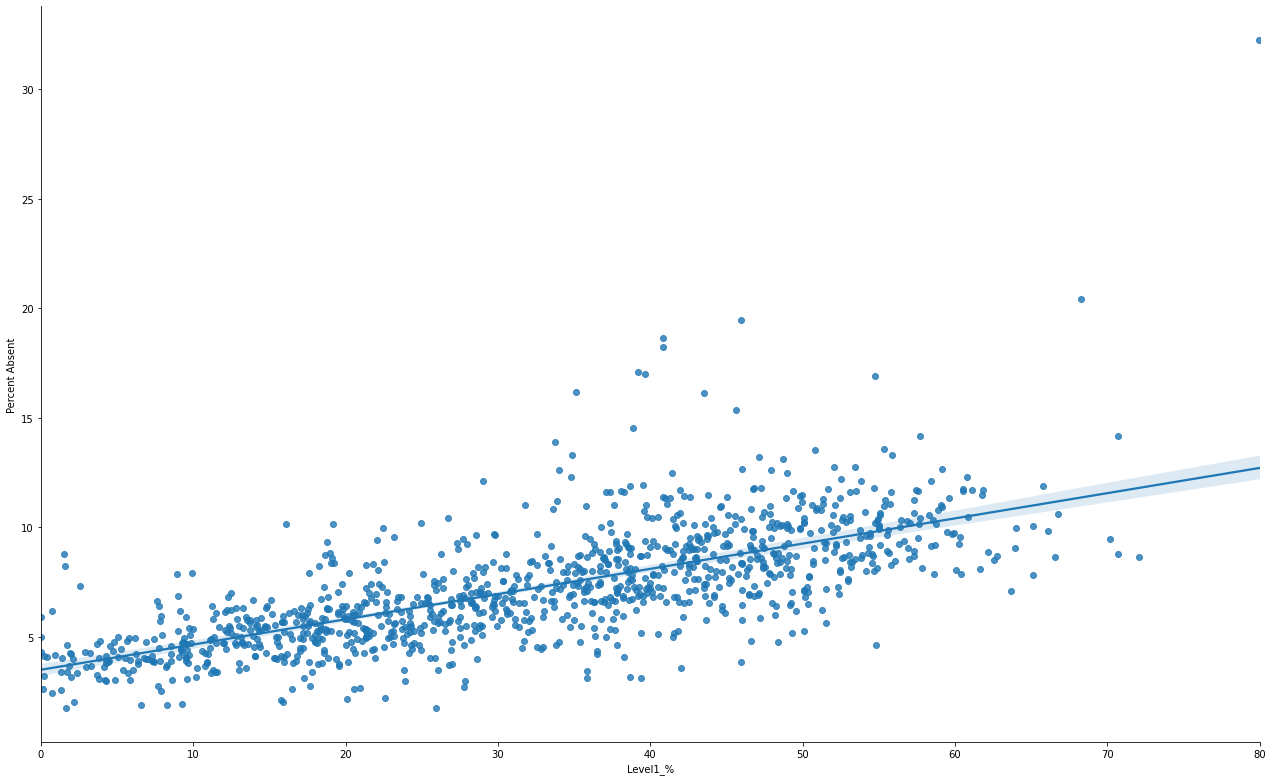

In [40]:
colors = sns.color_palette()
p = sb.lmplot('Level1_%', 'Percent Absent', data=ELA_ATT)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.xlim(0, 80)
plt.show()

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


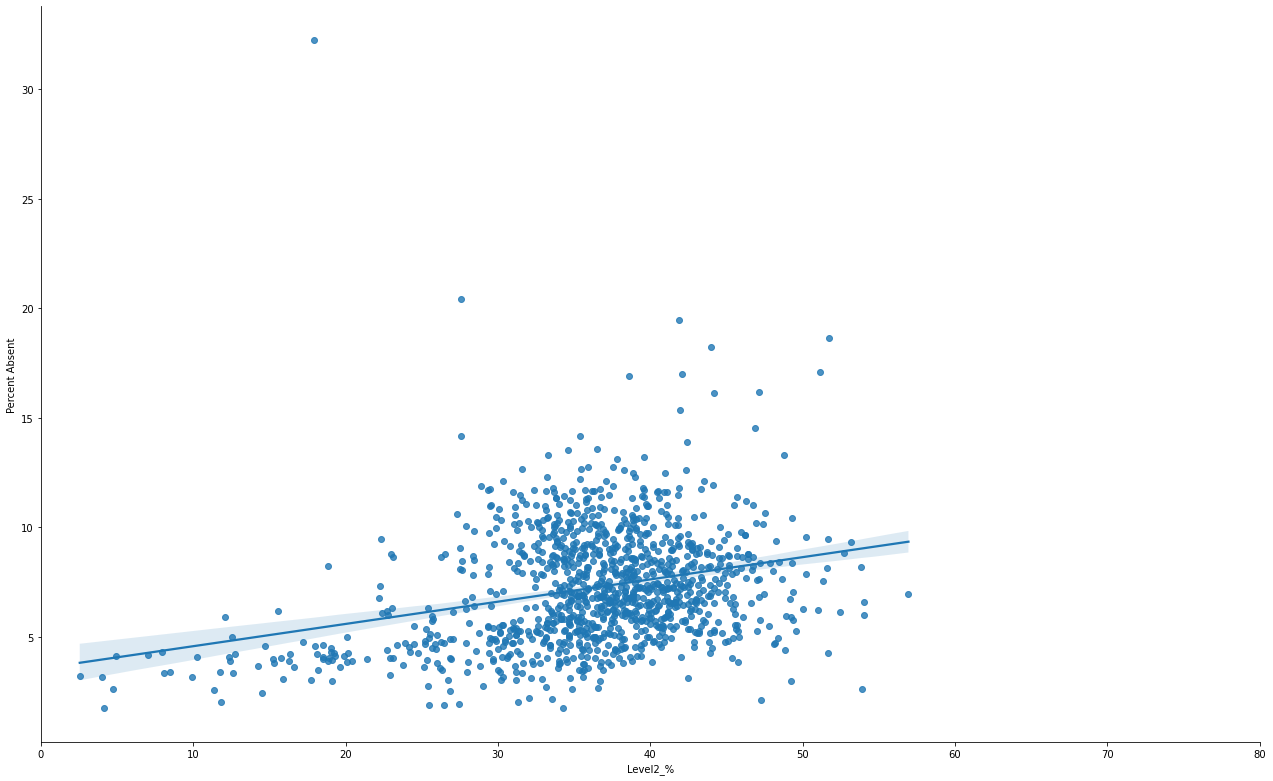

In [36]:
colors = sns.color_palette()
p = sb.lmplot('Level2_%', 'Percent Absent', data=ELA_ATT)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.xlim(0, 80)
plt.show()

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


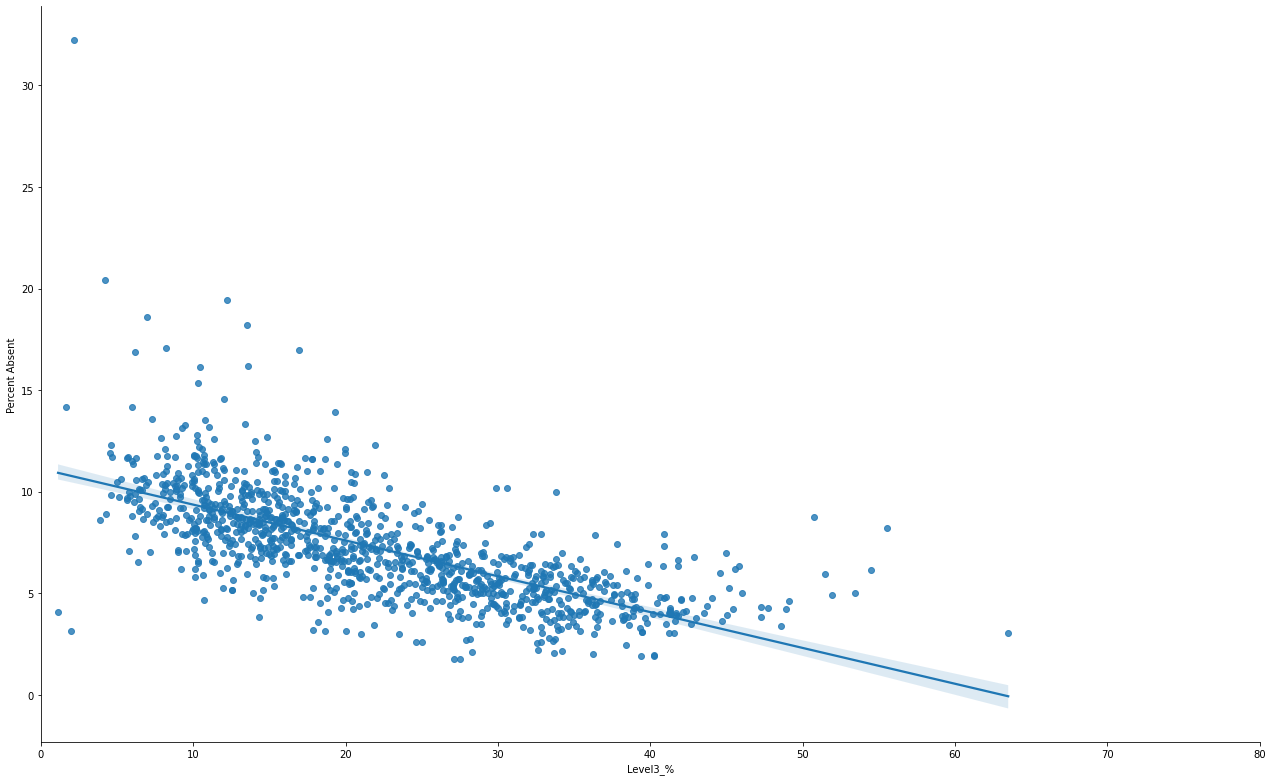

In [37]:
colors = sns.color_palette()
p = sb.lmplot('Level3_%', 'Percent Absent', data=ELA_ATT)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.xlim(0, 80)
plt.show()

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


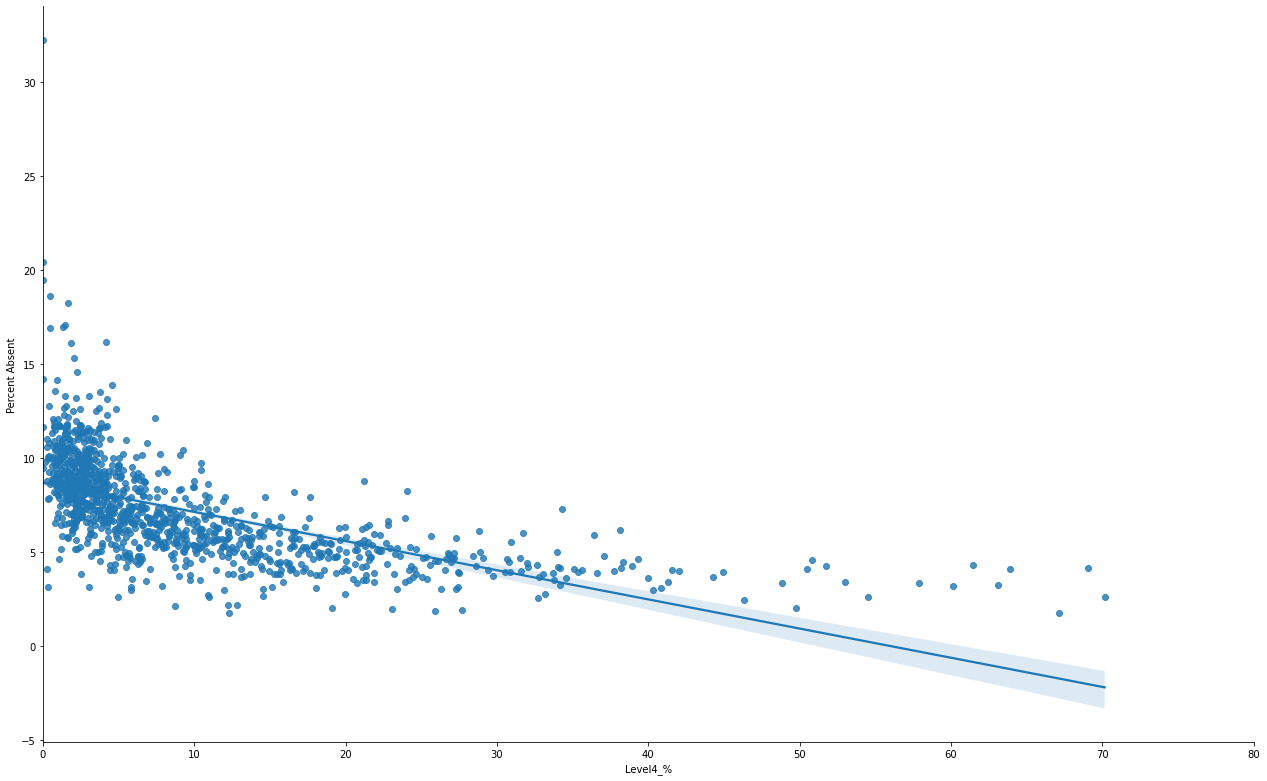

In [38]:
colors = sns.color_palette()
p = sb.lmplot('Level4_%', 'Percent Absent', data=ELA_ATT)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.xlim(0, 80)
plt.show()